In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Import Libraries**

In [ ]:
import pandas as pd      
import numpy as np      
from sklearn import svm
from sklearn.model_selection import train_test_split
from datetime import date
import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
import seaborn as sns
import scipy.optimize as opt
from sklearn import preprocessing
pd.set_option('display.max_columns', None)

%matplotlib inline 

# Load and Introduce Data

In [ ]:
data=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

One of my favorit methods of pandas instead of head() is sample():

Pandas sample() is used to generate a sample random row or column from the function caller data frame.

In [ ]:
data.sample(5)

The first step of every Project, is to knowing the data and theire characteristics and types. there is a lot of good methods in pandas libraries in order to know the dataset.

These data set includes information about:

-customerID: Customer ID

-gender: Whether the customer is a male or a female

-SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)

-Partner: Whether the customer has a partner or not (Yes, No)

-Dependents: Whether the customer has dependents or not (Yes, No)

-tenure: Number of months the customer has stayed with the company

-PhoneService: Whether the customer has a phone service or not (Yes, No)

-MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)

-InternetService: Customer’s internet service provider (DSL, Fiber optic, No)

-OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)

-OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)

-DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)

-TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)

-StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service) 

-StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)

-Contract: The contract term of the customer (Month-to-month, One year, Two year)

-PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)

-PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

-MonthlyCharges: The amount charged to the customer monthly

-TotalCharges: The total amount charged to the customer

-Churn: Whether the customer churned or not (Yes or No)

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
for col in data.columns:
    unique_cat = len(data[col].unique())
    print("Feature '{col}' has {unique_cat} unique categories".format(col=col, unique_cat=unique_cat))

# Deal with Missing Values

In [ ]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(data)

No missing Data? cool, maybe an ideal dataset

In [ ]:
data['Contract'].value_counts().to_frame()


In [ ]:
data['Contract'].value_counts().head(10).plot(kind="bar")

In [ ]:
data['StreamingTV'].value_counts().head(10).plot(kind="bar")

In [ ]:
data['Churn'].value_counts().head(10).plot(kind="bar")

# Convert features into numeric features

There are three main data types: 
    
*     Numeric, e.g. Tenure
*     Categorical, e.g. Payment Methods 
*     Ordinal, e.g. Contract

Models can only handle numeric features

Must convert categorical and ordinal features into numeric features



In [ ]:
all_data = data.copy()

In [ ]:
for (columnname, columndata) in all_data.iteritems():
    
      if all_data[columnname].dtypes == 'object':
            
            mapping = {lable:idx for idx, lable in enumerate(np.unique(all_data[columnname]))}
            all_data[columnname] = all_data[columnname].map(mapping)
            
all_data.sample(5)

In [ ]:
all_data.info()

# Normalization (Min-Max Scalar)



In this approach, the data is scaled to a fixed range — usually 0 to 1. In contrast to standardization, the cost of having this bounded range is that we will end up with smaller standard deviations, which can suppress the effect of outliers. Thus MinMax Scalar is sensitive to outliers.

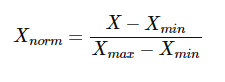

In [ ]:
# import MinMaxScalar from Scikit-learn and apply it to our data

from sklearn.preprocessing import MinMaxScaler

data_scaled = MinMaxScaler().fit_transform(all_data)
data_scaled

In [ ]:
# Converting data_scaled array to a pandas dataframe
Normalized_data = pd.DataFrame(data=data_scaled, index=all_data.index, columns=all_data.columns)
Normalized_data.head()

Descriptive Statistical Analysis

The describe function automatically computes basic statistics for all continuous variables.

This will show:

* the count of that variable
* the mean
* the standard deviation (std)
* the minimum value
* the IQR (Interquartile Range: 25%, 50% and 75%)
* the maximum value

In [ ]:
Normalized_data.describe()

In [ ]:
# Feature Selection

Feature selection is the process of finding and selecting the most useful features in a dataset. There are different methods but one of the simplest and fastest methods are based on univariate statistical tests. It examines each feature individually to determine the strength of the relationship of the feature with the response variable.

The statistical tests are calculated using all of the data. This means information from the validation and test sets could influence the features we keep, introducing a source of leakage. This means we should select features using only a training set, So before doing anything i should split my dataset into Train, Valid and test sets:

1- One way is to use numpy.split()

2- Other way is to use Train_Test_Split from sklearn.model_selection

Hier I used numpy.split() method:

In [ ]:
# produces a 60%, 20%, 20% split for training, validation and test sets.
 
train, validate, test = np.split(Normalized_data.sample(frac=1), [int(.6*len(Normalized_data)), int(.8*len(Normalized_data))])
train

In [ ]:
# Feature Selection : ANOVA F-VALUE Method
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


feature_cols = train.columns.drop('Churn')
fvalue_selector = SelectKBest(f_classif, k=10)


X_Kbest_fvalue = fvalue_selector.fit_transform(train[feature_cols], train['Churn'])
X_Kbest_fvalue

In [ ]:
# Get back the features we've kept, zero out all other features
selected_features = pd.DataFrame(fvalue_selector.inverse_transform(X_Kbest_fvalue), 
                                 index=train.index, 
                                 columns=feature_cols)
selected_features.head(2)

In [ ]:
selected_features = selected_features.loc[:, (selected_features != 0).any(axis=0)]
selected_features.columns.to_list()

Some other Feature Selection Methods


* Pearson Correlation
* Chi-Squared
* Recursive Feature Elimination
* Lasso: SelectFromModel
* Tree-based: SelectFromModel


In [ ]:
traindf = pd.DataFrame(train)
features = traindf.columns
Y = traindf['Churn']
X1 = traindf.copy()
del X1['Churn']
del X1['customerID']

# Set some Parameters
feature_name = list(X1.columns)
num_feats=15

**Pearson Correlation**

In [ ]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X1, Y,num_feats)
print(str(len(cor_feature)), 'selected features')

**Chi-Squared**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


chi_selector = SelectKBest(chi2, k='all')
chi_selector.fit(X1, Y)
chi_support = chi_selector.get_support()
chi_feature = X1.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

**Recursive Feature Elimination**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=15, verbose=5)
rfe_selector.fit(X1, Y)
rfe_support = rfe_selector.get_support()
rfe_feature = X1.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

**Lasso: SelectFromModel**

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=num_feats)
embeded_lr_selector.fit(X1, Y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X1.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

**Tree-based: SelectFromModel**

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X1, Y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X1.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

In [ ]:
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)

feature_selection_df

# Train/Test dataset

In [ ]:
X = Normalized_data.drop(['Churn'], axis=1)
y = Normalized_data[['Churn']]
print(X.shape, y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# Build Model

**Logistic Regression**


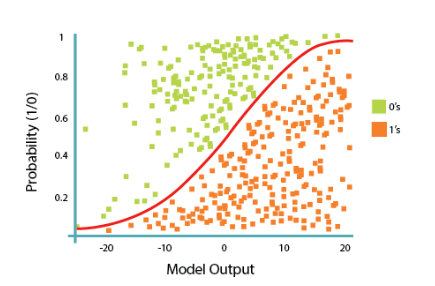

Build the model using LogisticRegression from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers but i dident go through this parameters.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models. C parameter indicates inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization.

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver= 'liblinear').fit(X_train,y_train)
LR

In [ ]:
yhat = LR.predict(X_test)
yhat

predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [ ]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

**7- Evaluation**


- Accuracy score

In [ ]:
LR.score(X_test, y_test)

- Confusion matrix

Another way of looking at accuracy of classifier is to look at confusion matrix.


I will improve this Notebook, it is not complete yet....